# Metrics Gallery
---

* References
   * scikit-learn > Documentation > API Reference > [sklearn.metrics: Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)
   * scikit-image > Documentation > API Reference > [skimage.measure](https://scikit-image.org/docs/stable/api/skimage.measure.html)

In [1]:
%matplotlib inline
from jin.python.jin_import import *
from jin.python import jin_metrics

import skimage

from sklearn import metrics

%load_ext version_information
%version_information matplotlib, numpy, pandas, seaborn, cv2, skimage, keras, tensorflow, sklearn

Using TensorFlow backend.


Software,Version
Python,3.6.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython,7.3.0
OS,Windows 10 10.0.17134 SP0
matplotlib,3.0.3
numpy,1.16.2
pandas,0.24.2
seaborn,0.9.0
cv2,3.4.1
skimage,0.15.0
keras,2.2.4


In [2]:
EPSILON = os.sys.float_info.epsilon

## Samples
---

### Images

In [3]:
from sklearn import datasets

In [4]:
imgs = datasets.load_sample_images()

imgs.filenames

['C:\\Users\\user\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\images\\china.jpg',
 'C:\\Users\\user\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\images\\flower.jpg']

In [5]:
img = imgs.images[1]

print(img.dtype, img.shape)
jin_utils.print_min_max(img)

uint8 (427, 640, 3)
min, max: [0.000, 255.000]


In [6]:
blurred_img1 = cv.GaussianBlur(img, (5, 5), 1.0)

print(blurred_img1.dtype, blurred_img1.shape)
jin_utils.print_min_max(blurred_img1)

uint8 (427, 640, 3)
min, max: [0.000, 249.000]


In [7]:
blurred_img2 = cv.GaussianBlur(img, (11, 11), 2.0)

print(blurred_img2.dtype, blurred_img2.shape)
jin_utils.print_min_max(blurred_img2)

uint8 (427, 640, 3)
min, max: [0.000, 243.000]


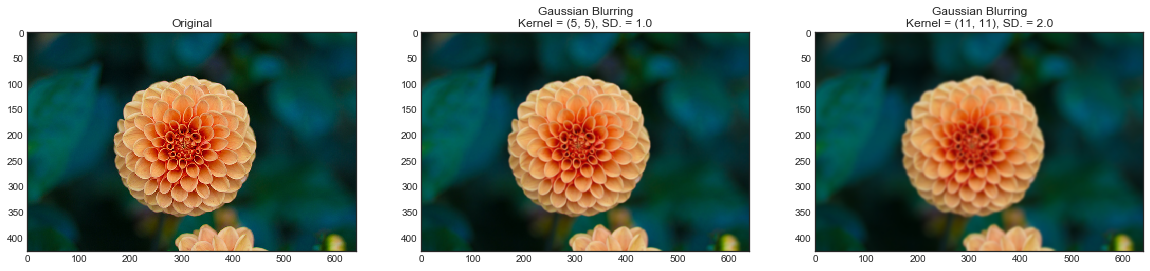

In [8]:
plt.figure(figsize=(20, 10))

plt.subplot(131)
plt.title('Original')
plt.imshow(img)

plt.subplot(132)
plt.title('Gaussian Blurring\nKernel = (5, 5), SD. = 1.0')
plt.imshow(blurred_img1)

plt.subplot(133)
plt.title('Gaussian Blurring\nKernel = (11, 11), SD. = 2.0')
plt.imshow(blurred_img2)

plt.show()

## Mean Squared Error (MSE)
---

* **References**
   * Wikipedia > [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)
   
   
In statistics, the **mean squared error (MSE)** or **mean squared deviation (MSD)** of an estimator (of a procedure for estimating an unobserved quantity) measures **the average of the squares of the errors**—that is, the average squared difference between the estimated values and what is estimated.


### Predictor


If a vector of ${\displaystyle n}$ predictions generated from a sample of n data points on all variables, and ${\displaystyle Y}$ is the vector of observed values of the variable being predicted, then the within-sample MSE of the predictor is computed as:


$$
{\displaystyle \operatorname {MSE} = {\frac {1}{n}}\sum _{i=1}^{n}({\hat {Y_{i}}} - Y_{i})^{2}}
$$


### Estimator


The MSE of an estimator ${\displaystyle {\hat {\theta }}}$ with respect to an unknown parameter ${\displaystyle \theta }$ is defined as:


$$
{\displaystyle \operatorname {MSE} ({\hat {\theta }}) = {\operatorname {E} _{\hat {\theta }}\left[({\hat {\theta }}-\theta )^{2}\right]}}
$$


### Image


Given a noise-free ${\displaystyle m\times n}$ monochrome image ${\displaystyle I}$ and its noisy approximation ${\displaystyle {\hat I}}$, MSE is defined as:


$$
{\displaystyle \operatorname {MSE} = {\frac {1}{m\,n}}\sum _{{i=0}}^{{m-1}}\sum _{{j=0}}^{{n-1}}[\hat I(i,j) - I(i,j)]^{2}}
$$

In [9]:
jin_metrics.mse(img, img)

0.0

In [10]:
jin_metrics.mse(img, blurred_img1)

30.57206162177986

In [11]:
jin_metrics.mse(img, blurred_img2)

82.66657884465262

#### sklearn.metrics.mean_squared_error


* 1D or 2D 데이터만 사용 가능
* 데이터를 float type으로 casting하여 arguments로 줘야 한다.

In [12]:
np.mean([metrics.mean_squared_error(img[..., ch].astype(np.float64), img[..., ch].astype(np.float64)) for ch in range(img.shape[-1])])

0.0

In [13]:
np.mean([metrics.mean_squared_error(img[..., ch].astype(np.float64), blurred_img1[..., ch].astype(np.float64)) for ch in range(img.shape[-1])])

30.572061621779863

In [14]:
np.mean([metrics.mean_squared_error(img[..., ch].astype(np.float64), blurred_img2[..., ch].astype(np.float64)) for ch in range(img.shape[-1])])

82.66657884465262

#### skimage.measure.compare_mse

In [15]:
skimage.measure.compare_mse(img, img)

0.0

In [16]:
skimage.measure.compare_mse(img, blurred_img1)

30.57206162177986

In [17]:
skimage.measure.compare_mse(img, blurred_img2)

82.66657884465262

## Mean Absolute Error (MAE)
---

* **References**
   * Wikipedia > [Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error)
   
   
In statistics, **mean absolute error (MAE)** is a measure of **difference between two continuous variables**. MAE is the average vertical distance between each point and the identity line. MAE is also the average horizontal distance between each point and the identity line.


$$
{\displaystyle \operatorname {MAE} ={\frac {\sum _{i=1}^{n}\left|y_{i}-x_{i}\right|}{n}}={\frac {\sum _{i=1}^{n}\left|e_{i}\right|}{n}}}
$$

#### sklearn.metrics.mean_absolute_error


* 1D or 2D 데이터만 사용 가능
* Data type에 따라 값이 바뀌는 것에 주의

In [18]:
np.mean([metrics.mean_absolute_error(img[..., ch], img[..., ch]) for ch in range(img.shape[-1])])

0.0

In [19]:
np.mean([metrics.mean_absolute_error(img[..., ch], blurred_img1[..., ch]) for ch in range(img.shape[-1])])

49.59191427595629

In [20]:
np.mean([metrics.mean_absolute_error(img[..., ch], blurred_img2[..., ch]) for ch in range(img.shape[-1])])

109.81231459797033

In [21]:
np.mean([metrics.mean_absolute_error(img[..., ch].astype(np.float64), img[..., ch].astype(np.float64)) for ch in range(img.shape[-1])])

0.0

In [22]:
np.mean([metrics.mean_absolute_error(img[..., ch].astype(np.float64), blurred_img1[..., ch].astype(np.float64)) for ch in range(img.shape[-1])])

2.094753854410617

In [23]:
np.mean([metrics.mean_absolute_error(img[..., ch].astype(np.float64), blurred_img2[..., ch].astype(np.float64)) for ch in range(img.shape[-1])])

3.5511538836846213

## Root Mean Square Error (RMSE)
---

* **References**
   * Wikipedia > [Root-mean-square deviation](https://en.wikipedia.org/wiki/Root-mean-square_deviation)
   * [HOW TO NORMALIZE THE RMSE](https://www.marinedatascience.co/blog/2019/01/07/normalizing-the-rmse/)
   
   
The **root-mean-square deviation (RMSD)** or **root-mean-square error (RMSE)** (or sometimes **root-mean-squared error**) is a frequently used measure of the **differences between values (sample or population values) predicted by a model or an estimator and the values observed**.


$$
{\displaystyle \operatorname {RMSE}(\hat{\theta}) = \sqrt {\operatorname {MSE}(\hat{\theta})} = \sqrt{\operatorname {E} _{\hat {\theta }}\left[({\hat {\theta }}-\theta )^{2}\right]}}
$$


### Normalized Root Mean Square Error (NRMSE): [%]
---

Normalizing the RMSD facilitates the comparison between datasets or models with **different scales**. Though there is no consistent means of normalization in the literature, common choices are the **mean** or the **range (defined as the maximum value minus the minimum value)** of the measured data. The value often expressed as a **percentage**, where lower values indicate less residual variance.


RMSE can be normalized by:


* mean


$$
{\displaystyle \operatorname {NRMSE} ={\frac {\operatorname {RMSE} }{\bar {y}}}}
$$


※ When normalizing by the mean value of the measurements, the term **coefficient of variation of the RMSE (CV(RMSE))** may be used to avoid ambiguity.


* range (difference between maximum and minimum)


$$
{\displaystyle \operatorname {NRMSE} = \frac {\operatorname {RMSE}}{y_\max - y_\min}}
$$


* standard deviation


$$
{\displaystyle \operatorname {NRMSE} = \frac {\operatorname {RMSE}}{\sigma}}
$$


* interquartile range (IQR)


$$
{\displaystyle \operatorname {NRMSE} = \frac {\operatorname {RMSE}}{\operatorname {IQR}} = \frac {\operatorname {RMSE}}{Q_{3} - Q_{1}}}
$$


where ${\displaystyle Q_{1} = {\operatorname {CDF}}^{-1}(0.25)}$, ${\displaystyle Q_{3} = {\operatorname {CDF}}^{-1}(0.75)}$ and ${\displaystyle \operatorname {CDF}^{-1}}$ is the **quantile function**.

In [24]:
jin_metrics.rmse(img, img)

0.0

In [25]:
jin_metrics.rmse(img, blurred_img1)

5.529200812213268

In [26]:
jin_metrics.rmse(img, blurred_img2)

9.092116301755748

In [27]:
jin_metrics.rmse(img, blurred_img2, norm_type='euclidean')

0.10429001415579969

In [28]:
jin_metrics.rmse(img, blurred_img2, norm_type='iqr')

0.12454953838021574

In [29]:
jin_metrics.rmse(img, blurred_img2, norm_type='mean')

0.1468734553618671

In [30]:
jin_metrics.rmse(img, blurred_img2, norm_type='max-min')

0.035655358046100975

In [31]:
jin_metrics.rmse(img, blurred_img2, norm_type='sd')

0.035655358046100975

#### skimage.measure.compare_nrmse

In [32]:
skimage.measure.compare_nrmse(img, img)

0.0

In [33]:
skimage.measure.compare_nrmse(img, blurred_img1)

0.06342202539409089

In [34]:
skimage.measure.compare_nrmse(img, blurred_img2, norm_type='euclidean')

0.10429001415579969

In [35]:
skimage.measure.compare_nrmse(img, blurred_img2, norm_type='mean')

0.14687344354580636

In [36]:
skimage.measure.compare_nrmse(img, blurred_img2, norm_type='min-max')

0.035655358046100975

## Peak Signal-to-Noise Ratio (PSNR): [0, ∞) [dB]
---

* **References**
   * Wikipedia > [Peak signal-to-noise ratio](https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio)
   
   
**Peak signal-to-noise ratio (PSNR)** is an engineering term for **the ratio between the maximum possible power of a signal and the power of corrupting noise** that affects the fidelity of its representation. Because many signals have a very wide **dynamic range**, PSNR is usually expressed in terms of the **logarithmic decibel scale**.


The PSNR (in dB) is defined as:


$$
{\displaystyle \begin {aligned} {\operatorname {PSNR}} &= 10\cdot \log _{{10}}\left({\frac {{\mathit {MAX}}_{I}^{2}}{{\operatorname {MSE}}}}\right)\\
&= 20\cdot \log _{{10}}\left({\frac {{\mathit {MAX}}_{I}}{{\sqrt  {{\operatorname {MSE}}}}}}\right)\\
&= 20\cdot \log _{{10}}\left({{\mathit {MAX}}_{I}}\right)-10\cdot \log _{{10}}\left({{{\operatorname {MSE}}}}\right)\end{aligned}}
$$


where ${\mathit {MAX}}_{I}$ is the maximum possible pixel value (the data range) of the image.


For color images with three RGB values per pixel, the definition of PSNR is the same except the MSE is the sum over all squared value differences (now for each color, i.e. three as much differences as in a monochrome image) divided by image size and by three. Alternately, for color images the image is converted to a different color space and PSNR is reported against each channel of that color space, e.g., YCbCr or HSL.


* Typical values for the PSNR
   * 8-bit data: between 30 and 50 dB
   * 16-bit data: between 60 and 80 dB


Although a higher PSNR generally indicates that the reconstruction is of higher quality, in some cases it may not. One has to be extremely careful with the range of validity of this metric; it is only conclusively valid **when it is used to compare results from the same codec (or codec type) and same content**.


Generally, PSNR has been shown to **perform poorly** compared to other quality metrics when it comes to **estimating the quality of images and particularly videos as perceived by humans**.

#### skimage.measure.compare_psnr

In [49]:
# skimage.measure.compare_psnr(img, img, data_range=255)

img2 = img.copy()
img2[0, 0, 0] = img2[0, 0, 0] + EPSILON
skimage.measure.compare_psnr(img, img2, data_range=255)

inf

In [38]:
skimage.measure.compare_psnr(img, blurred_img1, data_range=255)

33.277556345797294

In [39]:
skimage.measure.compare_psnr(img, blurred_img2, data_range=255)

28.95750396140022

## Structural Similarity (SSIM): [0, 1]
---

* **References**
   * Wikipedia > [Structural similarity](https://en.wikipedia.org/wiki/Structural_similarity)


**Structural similarity (SSIM)** is used for measuring the **similarity between two images**. The difference with respect to other techniques mentioned previously such as **MSE or PSNR is that these approaches estimate absolute errors**; on the other hand, **SSIM is a perception-based model that considers image degradation as perceived change in structural information**, while also incorporating important perceptual phenomena, including both luminance masking and contrast masking terms.


The SSIM index is calculated on various windows of an image. The measure between two windows ${\displaystyle x}$ and ${\displaystyle y}$ of common size ${\displaystyle N \times N}$ is:


$$
{\displaystyle \operatorname {SSIM}(x,y)={\frac  {(2\mu _{x}\mu _{y}+c_{1})(2\sigma _{{xy}}+c_{2})}{(\mu _{x}^{2}+\mu _{y}^{2}+c_{1})(\sigma _{x}^{2}+\sigma _{y}^{2}+c_{2})}}}
$$


For an image, it is typically calculated using a sliding **Gaussian window of size 11x11** or a **block window of size 8×8**.

#### skimage.measure.compare_ssim


* `win_size`: 7 (default)
* 다채널 이미지의 SSIM을 구하고 싶다면 `multichannel`을 True로 설정해야 한다.

In [43]:
skimage.measure.compare_ssim(img, img, data_range=255, multichannel=True)

1.0

In [44]:
skimage.measure.compare_ssim(img, blurred_img1, data_range=255, multichannel=True)

0.9623417949434931

In [45]:
skimage.measure.compare_ssim(img, blurred_img2, win_size=3, data_range=255, multichannel=True)

0.890128798726188

In [46]:
skimage.measure.compare_ssim(img, blurred_img2, win_size=7, data_range=255, multichannel=True)

0.9069557543157792

In [47]:
skimage.measure.compare_ssim(img, blurred_img2, win_size=11, data_range=255, multichannel=True)

0.9222150692889223

In [48]:
skimage.measure.compare_ssim(img, blurred_img2, data_range=255, multichannel=True, gaussian_weights=True)

0.9008811903812578